In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv(r"C:\Users\Aneesh Mada\Downloads\youtube_recommendation_dataset -.csv")

In [3]:
data.head()

,Title,channel_title,published_at,category_id,view_count,like_count,comment_count,favorite_count,duration,definition,caption,engagement_rate,likes_to_views_ratio,comments_to_views_ratio,duration_seconds,video_age_days
0,LA PERVERSA X LA INSUPERABLE X ALOFOKE MUSIC X...,AlofokeMusicSounds,2025-11-16 15:34:55+00:00,10,1405647,140463,9063,0,PT1M51S,hd,False,0.106375,0.099928,0.006448,111,1
1,Moana | Official Teaser,Disney,2025-11-17 17:00:47+00:00,24,2776847,26801,6684,0,PT1M,hd,True,0.012059,0.009652,0.002407,60,0
2,$0 - $1 Trillion Only FISHING in Steal a Brain...,CaylusBlox,2025-11-17 22:57:14+00:00,20,1189857,16174,1827,0,PT18M2S,hd,False,0.015129,0.013593,0.001535,1082,0
3,ALLDAY PROJECT - ‘ONE MORE TIME’ M/V,THEBLACKLABEL,2025-11-17 09:00:07+00:00,10,5319161,0,12869,0,PT3M23S,hd,True,0.002419,0.000000,0.002419,203,1
4,La Lupa | Vendetta Hero Trailer | Overwatch 2,PlayOverwatch,2025-11-17 17:00:06+00:00,20,597542,41742,4728,0,PT3M35S,hd,True,0.077768,0.069856,0.007912,215,0


In [5]:
data.describe()

,category_id,view_count,like_count,comment_count,favorite_count,engagement_rate,likes_to_views_ratio,comments_to_views_ratio,duration_seconds,video_age_days
count,537.000000,5.370000e+02,5.370000e+02,537.000000,537.0,537.000000,537.000000,537.000000,537.000000,537.000000
mean,22.456238,2.145752e+07,4.336044e+05,7125.700186,0.0,0.028722,0.027692,0.001030,4802.746741,934.050279
std,5.854776,4.015200e+07,8.386711e+05,36075.115032,0.0,0.020608,0.019708,0.002166,13748.249437,904.546132
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.676921e+06,5.559100e+04,1018.000000,0.0,0.015579,0.015301,0.000115,52.000000,261.000000
50%,24.000000,6.385911e+06,1.550550e+05,2354.000000,0.0,0.024368,0.023565,0.000398,390.000000,658.000000
75%,27.000000,2.270604e+07,4.631890e+05,5925.000000,0.0,0.037366,0.036282,0.000954,1639.000000,1363.000000
max,28.000000,3.697310e+08,1.087934e+07,810641.000000,0.0,0.215744,0.199095,0.026031,105227.000000,4772.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    537 non-null    object 
 1   channel_title            537 non-null    object 
 2   published_at             537 non-null    object 
 3   category_id              537 non-null    int64  
 4   view_count               537 non-null    int64  
 5   like_count               537 non-null    int64  
 6   comment_count            537 non-null    int64  
 7   favorite_count           537 non-null    int64  
 8   duration                 537 non-null    object 
 9   definition               537 non-null    object 
 10  caption                  537 non-null    bool   
 11  engagement_rate          537 non-null    float64
 12  likes_to_views_ratio     537 non-null    float64
 13  comments_to_views_ratio  537 non-null    float64
 14  duration_seconds         5

In [7]:
data.isna().sum()

Title                      0
channel_title              0
published_at               0
category_id                0
view_count                 0
like_count                 0
comment_count              0
favorite_count             0
duration                   0
definition                 0
caption                    0
engagement_rate            0
likes_to_views_ratio       0
comments_to_views_ratio    0
duration_seconds           0
video_age_days             0
dtype: int64

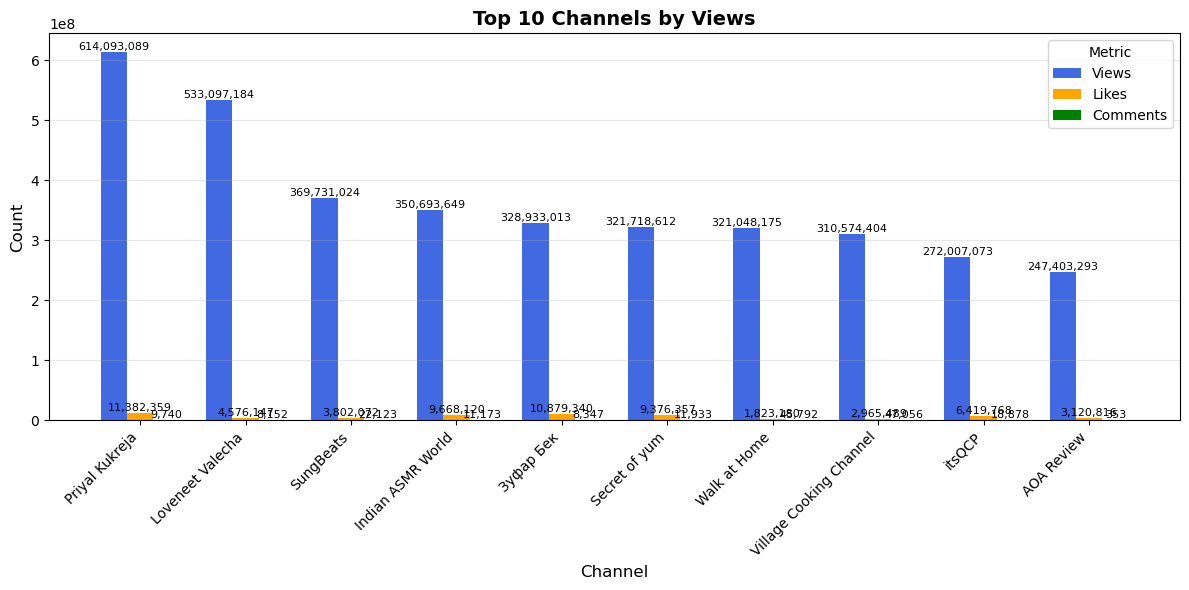

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate stats per channel
channel_stats = data.groupby('channel_title').agg({
    'view_count': 'sum',
    'like_count': 'sum',
    'comment_count': 'sum'
}).reset_index()

top_channels = channel_stats.sort_values('view_count', ascending=False).head(10)

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Set positions for grouped bars
x = range(len(top_channels))
width = 0.25

# Plot each metric as grouped bars
ax.bar([i - width for i in x], top_channels['view_count'], width=width, 
       label='Views', color='royalblue')
ax.bar(x, top_channels['like_count'], width=width, 
       label='Likes', color='orange')
ax.bar([i + width for i in x], top_channels['comment_count'], width=width, 
       label='Comments', color='green')

# Customize the plot
ax.set_title('Top 10 Channels by Views', fontsize=14, fontweight='bold')
ax.set_xlabel('Channel', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(top_channels['channel_title'], rotation=45, ha='right')
ax.legend(title='Metric')
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (views, likes, comments) in enumerate(zip(top_channels['view_count'], 
                                                  top_channels['like_count'], 
                                                  top_channels['comment_count'])):
    ax.text(i - width, views, f'{views:,.0f}', ha='center', va='bottom', fontsize=8)
    ax.text(i, likes, f'{likes:,.0f}', ha='center', va='bottom', fontsize=8)
    ax.text(i + width, comments, f'{comments:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

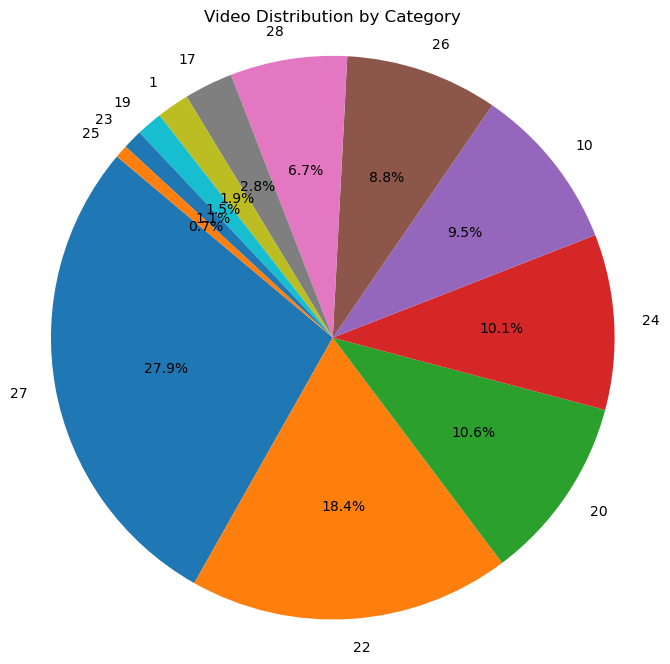

In [10]:
import matplotlib.pyplot as plt

# Count categories
category_counts = data['category_id'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Video Distribution by Category')
plt.axis('equal')  # Makes the pie a circle
plt.show()


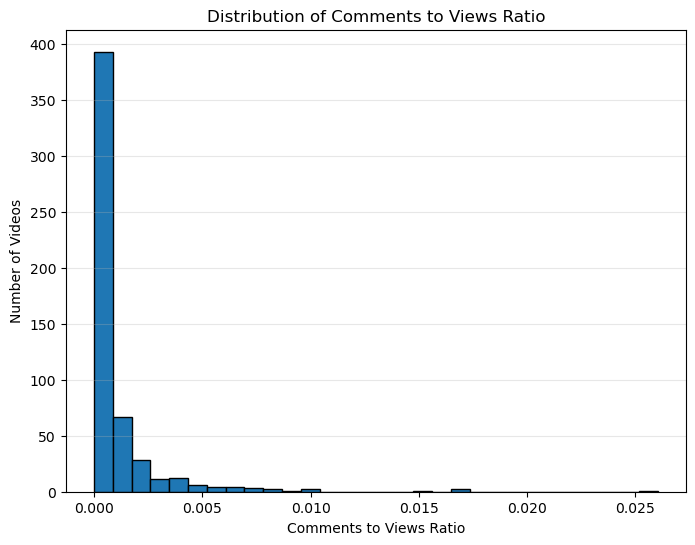

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.hist(
    data['comments_to_views_ratio'],
    bins=30,
    edgecolor='black'
)

plt.title('Distribution of Comments to Views Ratio')
plt.xlabel('Comments to Views Ratio')
plt.ylabel('Number of Videos')
plt.grid(axis='y', alpha=0.3)

plt.show()


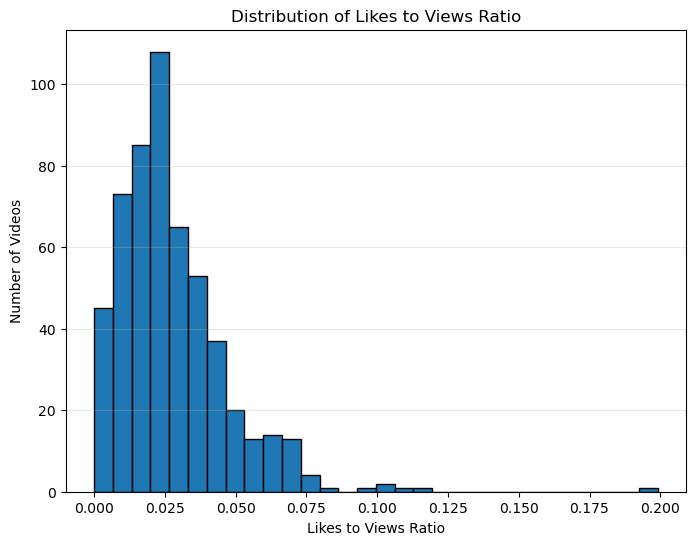

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.hist(
    data['likes_to_views_ratio'],
    bins=30,
    edgecolor='black'
)

plt.title('Distribution of Likes to Views Ratio')
plt.xlabel('Likes to Views Ratio')
plt.ylabel('Number of Videos')
plt.grid(axis='y', alpha=0.3)

plt.show()


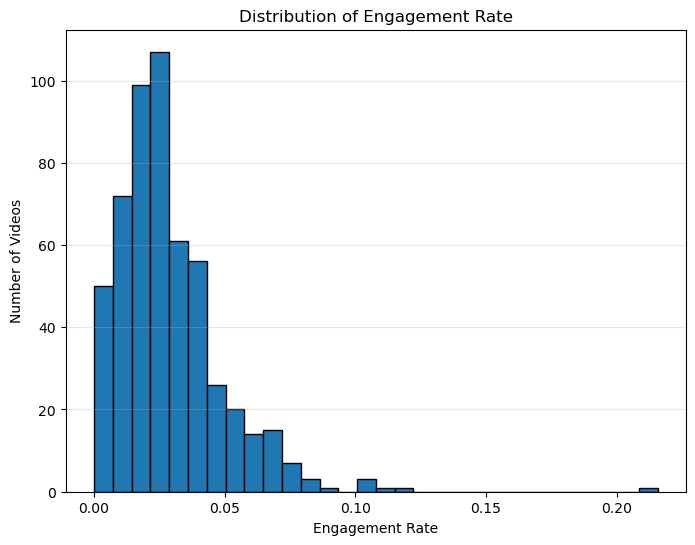

In [13]:
import matplotlib.pyplot as plt

# Ensure column names are clean
data.rename(columns=lambda x: x.strip(), inplace=True)

plt.figure(figsize=(8, 6))

plt.hist(
    data['engagement_rate'],
    bins=30,
    edgecolor='black'
)

plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Number of Videos')
plt.grid(axis='y', alpha=0.3)

plt.show()
